Train on 140 samples, validate on 36 samples
Epoch 1/1000
140/140 - 1s - loss: 0.8548 - val_loss: 0.9003
Epoch 2/1000
140/140 - 0s - loss: 0.6394 - val_loss: 0.6810
Epoch 3/1000
140/140 - 0s - loss: 0.4711 - val_loss: 0.5005
Epoch 4/1000
140/140 - 0s - loss: 0.3367 - val_loss: 0.3549
Epoch 5/1000
140/140 - 0s - loss: 0.2340 - val_loss: 0.2415
Epoch 6/1000
140/140 - 0s - loss: 0.1602 - val_loss: 0.1582
Epoch 7/1000
140/140 - 0s - loss: 0.1067 - val_loss: 0.1018
Epoch 8/1000
140/140 - 0s - loss: 0.0729 - val_loss: 0.0660
Epoch 9/1000
140/140 - 0s - loss: 0.0491 - val_loss: 0.0453
Epoch 10/1000
140/140 - 0s - loss: 0.0350 - val_loss: 0.0339
Epoch 11/1000
140/140 - 0s - loss: 0.0279 - val_loss: 0.0274
Epoch 12/1000
140/140 - 0s - loss: 0.0256 - val_loss: 0.0230
Epoch 13/1000
140/140 - 0s - loss: 0.0257 - val_loss: 0.0197
Epoch 14/1000
140/140 - 0s - loss: 0.0237 - val_loss: 0.0171
Epoch 15/1000
140/140 - 0s - loss: 0.0181 - val_loss: 0.0153
Epoch 16/1000
140/140 - 0s - loss: 0.0127 - val_l

140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 135/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 136/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 137/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 138/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 139/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 140/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 141/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 142/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 143/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 144/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 145/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 146/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 147/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0020
Epoch 148/1000
140/140 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 149/1000
140/140 - 0s - loss: 0.0012 - val_loss: 0.0019
Epoch 150/1000
140/140 

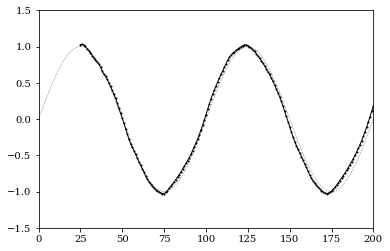

In [1]:
#RNN-Keras (sin波,隠れ層のユニット数=30)

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping


if __name__ == '__main__':
    np.random.seed(123)
    tf.random.set_seed(123)

    '''
    1. データの準備
    '''
    def sin(x, T=100):
        return np.sin(2.0 * np.pi * x / T)

    def toy_problem(T=100, ampl=0.05):
        x = np.arange(0, 2*T + 1)
        noise = ampl * np.random.uniform(low=-1.0, high=1.0,
                                         size=len(x))
        return sin(x) + noise

    T = 100
    f = toy_problem(T).astype(np.float32)
    length_of_sequences = len(f)
    maxlen = 25

    x = []
    t = []

    for i in range(length_of_sequences - maxlen):
        x.append(f[i:i+maxlen])
        t.append(f[i+maxlen])

    x = np.array(x).reshape(-1, maxlen, 1)
    t = np.array(t).reshape(-1, 1)

    x_train, x_val, t_train, t_val = \
        train_test_split(x, t, test_size=0.2, shuffle=False)

    '''
    2. モデルの構築
    '''
    model = Sequential()
    model.add(SimpleRNN(30, activation='tanh',
                        kernel_initializer='glorot_normal',
                        recurrent_initializer='orthogonal'))
    model.add(Dense(1, activation='linear'))

    '''
    3. モデルの学習
    '''
    optimizer = optimizers.Adam(learning_rate=0.001,
                                beta_1=0.9, beta_2=0.999, amsgrad=True)

    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')

    es = EarlyStopping(monitor='val_loss',
                       patience=10,
                       verbose=1)

    hist = model.fit(x_train, t_train,
                     epochs=1000, batch_size=100,
                     verbose=2,
                     validation_data=(x_val, t_val),
                     callbacks=[es])

    '''
    4. モデルの評価
    '''
    # sin波の予測
    sin = toy_problem(T, ampl=0.)
    gen = [None for i in range(maxlen)]

    z = x[:1]

    # 逐次的に予測値を求める
    for i in range(length_of_sequences - maxlen):
        preds = model.predict(z[-1:])
        z = np.append(z, preds)[1:]
        z = z.reshape(-1, maxlen, 1)
        gen.append(preds[0, 0])

    # 予測値を可視化
    fig = plt.figure()
    plt.rc('font', family='serif')
    plt.xlim([0, 2*T])
    plt.ylim([-1.5, 1.5])
    plt.plot(range(len(f)), sin,
             color='gray',
             linestyle='--', linewidth=0.5)
    plt.plot(range(len(f)), gen,
             color='black', linewidth=1,
             marker='o', markersize=1, markerfacecolor='black',
             markeredgecolor='black')
    # plt.savefig('output.jpg')
    plt.show()



Train on 140 samples, validate on 36 samples
Epoch 1/1000
140/140 - 1s - loss: 0.7106 - val_loss: 0.8766
Epoch 2/1000
140/140 - 0s - loss: 0.6984 - val_loss: 0.8688
Epoch 3/1000
140/140 - 0s - loss: 0.6873 - val_loss: 0.8611
Epoch 4/1000
140/140 - 0s - loss: 0.6760 - val_loss: 0.8537
Epoch 5/1000
140/140 - 0s - loss: 0.6647 - val_loss: 0.8461
Epoch 6/1000
140/140 - 0s - loss: 0.6534 - val_loss: 0.8384
Epoch 7/1000
140/140 - 0s - loss: 0.6425 - val_loss: 0.8308
Epoch 8/1000
140/140 - 0s - loss: 0.6318 - val_loss: 0.8230
Epoch 9/1000
140/140 - 0s - loss: 0.6212 - val_loss: 0.8153
Epoch 10/1000
140/140 - 0s - loss: 0.6109 - val_loss: 0.8075
Epoch 11/1000
140/140 - 0s - loss: 0.6010 - val_loss: 0.7999
Epoch 12/1000
140/140 - 0s - loss: 0.5912 - val_loss: 0.7920
Epoch 13/1000
140/140 - 0s - loss: 0.5816 - val_loss: 0.7835
Epoch 14/1000
140/140 - 0s - loss: 0.5723 - val_loss: 0.7741
Epoch 15/1000
140/140 - 0s - loss: 0.5630 - val_loss: 0.7636
Epoch 16/1000
140/140 - 0s - loss: 0.5536 - val_l

140/140 - 0s - loss: 0.0553 - val_loss: 0.0992
Epoch 135/1000
140/140 - 0s - loss: 0.0545 - val_loss: 0.0979
Epoch 136/1000
140/140 - 0s - loss: 0.0538 - val_loss: 0.0967
Epoch 137/1000
140/140 - 0s - loss: 0.0530 - val_loss: 0.0955
Epoch 138/1000
140/140 - 0s - loss: 0.0523 - val_loss: 0.0943
Epoch 139/1000
140/140 - 0s - loss: 0.0515 - val_loss: 0.0931
Epoch 140/1000
140/140 - 0s - loss: 0.0508 - val_loss: 0.0920
Epoch 141/1000
140/140 - 0s - loss: 0.0501 - val_loss: 0.0908
Epoch 142/1000
140/140 - 0s - loss: 0.0494 - val_loss: 0.0897
Epoch 143/1000
140/140 - 0s - loss: 0.0487 - val_loss: 0.0886
Epoch 144/1000
140/140 - 0s - loss: 0.0480 - val_loss: 0.0875
Epoch 145/1000
140/140 - 0s - loss: 0.0473 - val_loss: 0.0864
Epoch 146/1000
140/140 - 0s - loss: 0.0466 - val_loss: 0.0853
Epoch 147/1000
140/140 - 0s - loss: 0.0459 - val_loss: 0.0842
Epoch 148/1000
140/140 - 0s - loss: 0.0453 - val_loss: 0.0832
Epoch 149/1000
140/140 - 0s - loss: 0.0446 - val_loss: 0.0821
Epoch 150/1000
140/140 

Epoch 267/1000
140/140 - 0s - loss: 0.0125 - val_loss: 0.0230
Epoch 268/1000
140/140 - 0s - loss: 0.0125 - val_loss: 0.0229
Epoch 269/1000
140/140 - 0s - loss: 0.0124 - val_loss: 0.0228
Epoch 270/1000
140/140 - 0s - loss: 0.0124 - val_loss: 0.0226
Epoch 271/1000
140/140 - 0s - loss: 0.0123 - val_loss: 0.0225
Epoch 272/1000
140/140 - 0s - loss: 0.0123 - val_loss: 0.0224
Epoch 273/1000
140/140 - 0s - loss: 0.0122 - val_loss: 0.0222
Epoch 274/1000
140/140 - 0s - loss: 0.0121 - val_loss: 0.0221
Epoch 275/1000
140/140 - 0s - loss: 0.0121 - val_loss: 0.0219
Epoch 276/1000
140/140 - 0s - loss: 0.0120 - val_loss: 0.0218
Epoch 277/1000
140/140 - 0s - loss: 0.0120 - val_loss: 0.0217
Epoch 278/1000
140/140 - 0s - loss: 0.0119 - val_loss: 0.0216
Epoch 279/1000
140/140 - 0s - loss: 0.0119 - val_loss: 0.0214
Epoch 280/1000
140/140 - 0s - loss: 0.0118 - val_loss: 0.0213
Epoch 281/1000
140/140 - 0s - loss: 0.0118 - val_loss: 0.0212
Epoch 282/1000
140/140 - 0s - loss: 0.0117 - val_loss: 0.0211
Epoch 28

140/140 - 0s - loss: 0.0081 - val_loss: 0.0127
Epoch 400/1000
140/140 - 0s - loss: 0.0081 - val_loss: 0.0127
Epoch 401/1000
140/140 - 0s - loss: 0.0081 - val_loss: 0.0126
Epoch 402/1000
140/140 - 0s - loss: 0.0081 - val_loss: 0.0126
Epoch 403/1000
140/140 - 0s - loss: 0.0080 - val_loss: 0.0125
Epoch 404/1000
140/140 - 0s - loss: 0.0080 - val_loss: 0.0125
Epoch 405/1000
140/140 - 0s - loss: 0.0080 - val_loss: 0.0125
Epoch 406/1000
140/140 - 0s - loss: 0.0080 - val_loss: 0.0124
Epoch 407/1000
140/140 - 0s - loss: 0.0080 - val_loss: 0.0124
Epoch 408/1000
140/140 - 0s - loss: 0.0080 - val_loss: 0.0123
Epoch 409/1000
140/140 - 0s - loss: 0.0080 - val_loss: 0.0123
Epoch 410/1000
140/140 - 0s - loss: 0.0079 - val_loss: 0.0122
Epoch 411/1000
140/140 - 0s - loss: 0.0079 - val_loss: 0.0122
Epoch 412/1000
140/140 - 0s - loss: 0.0079 - val_loss: 0.0122
Epoch 413/1000
140/140 - 0s - loss: 0.0079 - val_loss: 0.0121
Epoch 414/1000
140/140 - 0s - loss: 0.0079 - val_loss: 0.0121
Epoch 415/1000
140/140 

Epoch 532/1000
140/140 - 0s - loss: 0.0067 - val_loss: 0.0091
Epoch 533/1000
140/140 - 0s - loss: 0.0067 - val_loss: 0.0091
Epoch 534/1000
140/140 - 0s - loss: 0.0067 - val_loss: 0.0091
Epoch 535/1000
140/140 - 0s - loss: 0.0067 - val_loss: 0.0091
Epoch 536/1000
140/140 - 0s - loss: 0.0067 - val_loss: 0.0091
Epoch 537/1000
140/140 - 0s - loss: 0.0067 - val_loss: 0.0091
Epoch 538/1000
140/140 - 0s - loss: 0.0067 - val_loss: 0.0091
Epoch 539/1000
140/140 - 0s - loss: 0.0067 - val_loss: 0.0091
Epoch 540/1000
140/140 - 0s - loss: 0.0066 - val_loss: 0.0090
Epoch 541/1000
140/140 - 0s - loss: 0.0066 - val_loss: 0.0090
Epoch 542/1000
140/140 - 0s - loss: 0.0066 - val_loss: 0.0090
Epoch 543/1000
140/140 - 0s - loss: 0.0066 - val_loss: 0.0090
Epoch 544/1000
140/140 - 0s - loss: 0.0066 - val_loss: 0.0090
Epoch 545/1000
140/140 - 0s - loss: 0.0066 - val_loss: 0.0089
Epoch 546/1000
140/140 - 0s - loss: 0.0066 - val_loss: 0.0089
Epoch 547/1000
140/140 - 0s - loss: 0.0066 - val_loss: 0.0089
Epoch 54

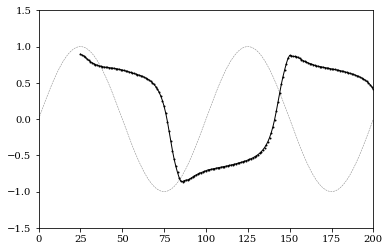

In [17]:
#RNN-Keras (sin波,隠れ層のユニット数=3)

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping


if __name__ == '__main__':
    np.random.seed(123)
    tf.random.set_seed(123)

    '''
    1. データの準備
    '''
    def sin(x, T=100):
        return np.sin(2.0 * np.pi * x / T)

    def toy_problem(T=100, ampl=0.05):
        x = np.arange(0, 2*T + 1)
        noise = ampl * np.random.uniform(low=-1.0, high=1.0,
                                         size=len(x))
        return sin(x) + noise

    T = 100
    f = toy_problem(T).astype(np.float32)
    length_of_sequences = len(f)
    maxlen = 25

    x = []
    t = []

    for i in range(length_of_sequences - maxlen):
        x.append(f[i:i+maxlen])
        t.append(f[i+maxlen])

    x = np.array(x).reshape(-1, maxlen, 1)
    t = np.array(t).reshape(-1, 1)

    x_train, x_val, t_train, t_val = \
        train_test_split(x, t, test_size=0.2, shuffle=False)

    '''
    2. モデルの構築
    '''
    model = Sequential()
    model.add(SimpleRNN(3, activation='tanh',
                        kernel_initializer='glorot_normal',
                        recurrent_initializer='orthogonal'))
    model.add(Dense(1, activation='linear'))

    '''
    3. モデルの学習
    '''
    optimizer = optimizers.Adam(learning_rate=0.001,
                                beta_1=0.9, beta_2=0.999, amsgrad=True)

    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')

    es = EarlyStopping(monitor='val_loss',
                       patience=10,
                       verbose=1)

    hist = model.fit(x_train, t_train,
                     epochs=1000, batch_size=100,
                     verbose=2,
                     validation_data=(x_val, t_val),
                     callbacks=[es])

    '''
    4. モデルの評価
    '''
    # sin波の予測
    sin = toy_problem(T, ampl=0.)
    gen = [None for i in range(maxlen)]

    z = x[:1]

    # 逐次的に予測値を求める
    for i in range(length_of_sequences - maxlen):
        preds = model.predict(z[-1:])
        z = np.append(z, preds)[1:]
        z = z.reshape(-1, maxlen, 1)
        gen.append(preds[0, 0])

    # 予測値を可視化
    fig = plt.figure()
    plt.rc('font', family='serif')
    plt.xlim([0, 2*T])
    plt.ylim([-1.5, 1.5])
    plt.plot(range(len(f)), sin,
             color='gray',
             linestyle='--', linewidth=0.5)
    plt.plot(range(len(f)), gen,
             color='black', linewidth=1,
             marker='o', markersize=1, markerfacecolor='black',
             markeredgecolor='black')
    # plt.savefig('output.jpg')
    plt.show()
